In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
timing_data = pd.read_csv("../results/timing_data.csv")
timing_data.head()

,sort,nth_element,max_element,max_element_ben_deane,accumulate,transform_reduce
0,5190.49,9637.74,18185.1,12386.2,5490.10,11714.1
1,4838.23,4140.38,12782.2,16768.0,5545.80,11406.3
2,4355.45,6654.27,12623.2,12227.7,5418.60,11493.4
3,4464.56,2598.69,14997.1,12295.4,5556.15,11896.9
4,5039.92,2835.86,14741.3,12196.8,5611.94,10659.9


In [3]:
centered_data = 1e-3*(timing_data - timing_data.median()); # us to ms
centered_data.head()

,sort,nth_element,max_element,max_element_ben_deane,accumulate,transform_reduce
0,0.187095,4.34422,4.29955,0.0004,0.12684,0.5647
1,-0.165165,-1.15314,-1.10335,4.3822,0.18254,0.2569
2,-0.647945,1.36075,-1.26235,-0.1581,0.05534,0.3440
3,-0.538835,-2.69483,1.11155,-0.0904,0.19289,0.7475
4,0.036525,-2.45766,0.85575,-0.1890,0.24868,-0.4895


(0.0, 30.0)

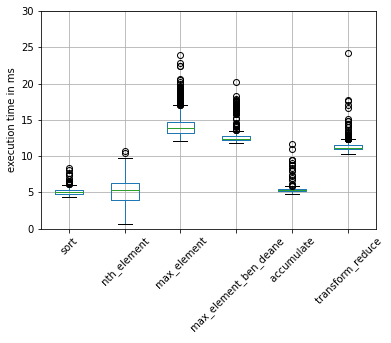

In [4]:
timing_data_ms = 1e-3*timing_data
plt = timing_data_ms.boxplot(rot = 45);
plt.set_ylabel("execution time in ms")
plt.set_ylim([0, 30])

(-5.0, 15.0)

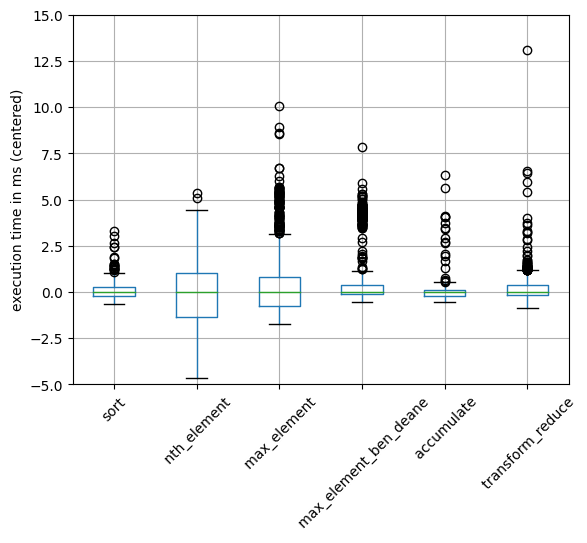

In [5]:
plt = centered_data.boxplot(rot = 45);
plt.set_ylabel("execution time in ms (centered)")
plt.set_ylim([-5, 15])

In [6]:
timing_data.max()*1e-3

sort                       8.32849
 nth_element              10.66370
 max_element              23.94270
 max_element_ben_deane    20.25920
 accumulate               11.71170
 transform_reduce         24.26220
dtype: float64

In [7]:
data_seq = pd.read_csv("../results/comparison_of_algorithms_sequential.csv")
data_seq

,size,sort,nth_element,max_element,max_element_ben_deane,accumulate,transform_reduce
0,10,0.000108,0.000108,0.000056,0.000061,0.000026,0.000023
1,100,0.002066,0.000682,0.000120,0.000120,0.000089,0.000234
2,1000,0.027922,0.005090,0.000778,0.000886,0.000459,0.001002
3,3162,0.103640,0.015237,0.003207,0.001997,0.001534,0.003566
4,10000,0.385187,0.048723,0.011303,0.006530,0.005127,0.011720
5,31623,1.358810,0.150038,0.036541,0.021891,0.019392,0.035914
6,100000,4.773320,0.484705,0.106745,0.062919,0.050575,0.121966
7,177828,NaN,0.892646,0.207950,0.120573,0.098566,0.221445
8,316228,NaN,1.606020,0.415941,0.256989,0.183136,0.399543
9,562341,NaN,2.891610,0.696527,0.504187,0.441785,0.703731


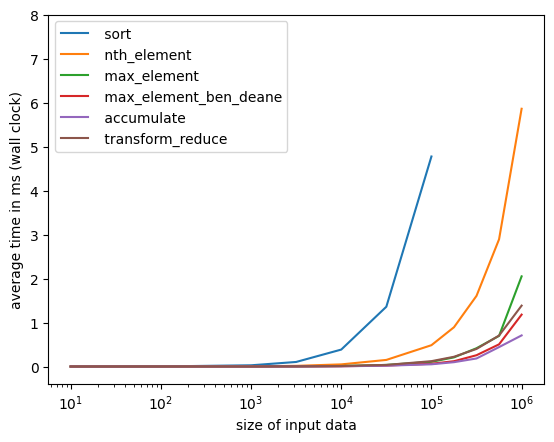

In [8]:
data_seq.plot(x="size", logx=True, xlabel="size of input data", ylabel="average time in ms (wall clock)", ylim=[-0.4, 8]);

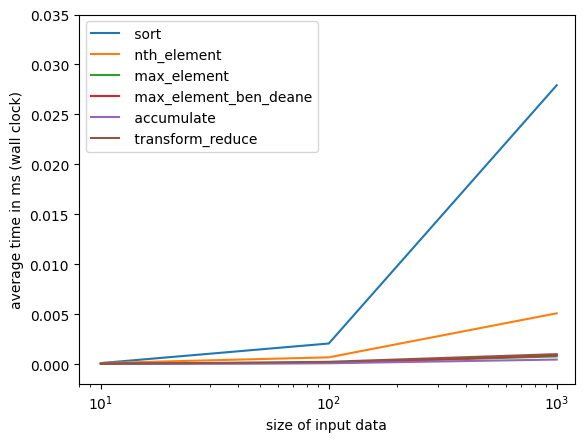

In [10]:
data_seq.iloc[0:3,:].plot(x="size", logx=True, xlabel="size of input data", ylabel="average time in ms (wall clock)", xlim=[8, 1200], ylim=[-0.002, 0.035]);

In [11]:
data_par = pd.read_csv("../results/comparison_of_algorithms_parallel.csv")
data_par

,size,sort,nth_element,max_element,max_element_ben_deane,reduce,transform_reduce
0,10,0.002486,0.004137,0.003299,0.004603,0.000859,0.001022
1,100,0.002613,0.046708,0.020141,0.015499,0.005857,0.006125
2,1000,0.051094,0.222107,0.033085,0.035293,0.019486,0.018448
3,3162,0.086314,0.490191,0.049704,0.048417,0.021655,0.020771
4,10000,0.254417,0.885207,0.070533,0.055925,0.022807,0.020518
5,31623,0.491098,1.288010,0.103971,0.061380,0.027760,0.032774
6,100000,1.875650,2.826460,0.251568,0.100531,0.049872,0.070185
7,177828,3.534930,4.213480,0.400904,0.157630,0.072531,0.101161
8,316228,5.431690,5.654420,0.639452,0.320258,0.154552,0.207637
9,562341,NaN,7.573680,0.828236,0.714485,0.151088,0.214343


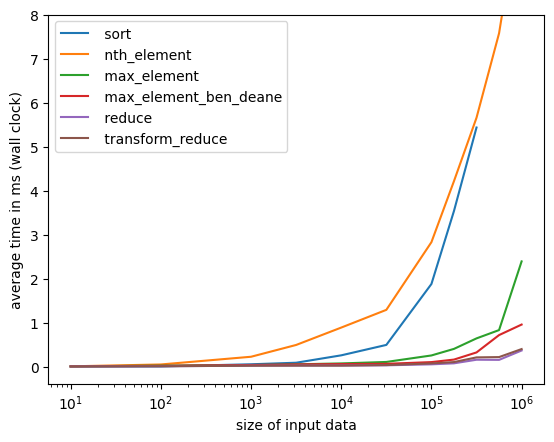

In [12]:
data_par.plot(x="size", logx=True, xlabel="size of input data", ylabel="average time in ms (wall clock)", ylim=[-0.4, 8]);

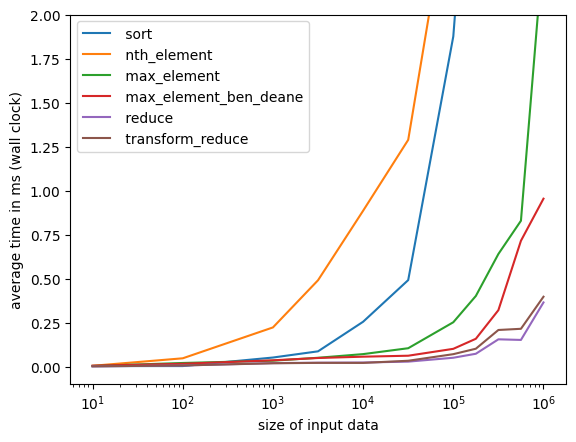

In [13]:
data_par.plot(x="size", logx=True, xlabel="size of input data", ylabel="average time in ms (wall clock)", ylim=[-0.1, 2]);